In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-10-01 08:46:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-10-01 08:46:42 (104 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 35s 57ms/step - loss: 0.4550 - accuracy: 0.7689 - val_loss: 0.3871 - val_accuracy: 0.8234
Epoch 2/10
625/625 [==============================] - 35s 55ms/step - loss: 0.3496 - accuracy: 0.8431 - 

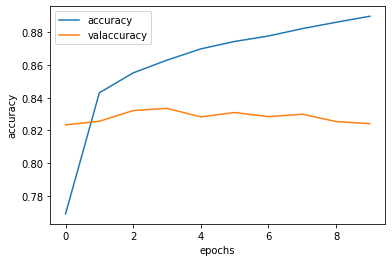

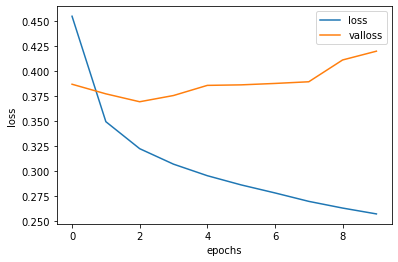

In [8]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

with open('/tmp/sarcasm.json', 'r') as jsonfile:
    data = json.load(jsonfile)

sentences = []
labels = []
for items in data:
    sentences.append(items['headline'])
    labels.append(items['is_sarcastic'])

training_size = 20000
vocab_size = 1000
max_len = 120
embedding_dim = 16
oov_tok = "<OOV>"
padding_type = "post"
trunc_type = "post"


training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.summary()
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_1 = model_1.fit(training_padded, training_labels,
                        epochs=10, 
                        validation_data=(testing_padded, testing_labels))


def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val'+string])
    plt.show()

plot_graphs(history_1,'accuracy')
plot_graphs(history_1,'loss')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 8s 14ms/step - loss: 0.4713 - accuracy: 0.7678 - val_loss: 0.4

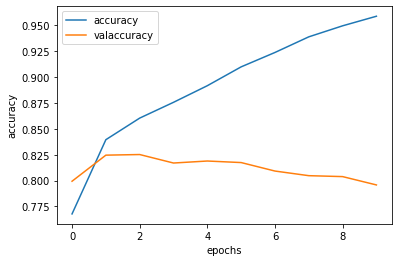

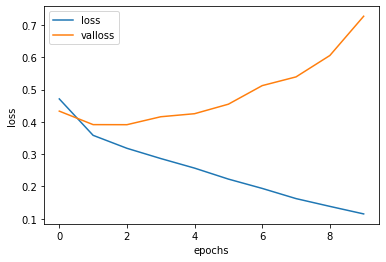

In [10]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_2 = model_2.fit(training_padded, training_labels,
                        epochs=10, 
                        validation_data=(testing_padded, testing_labels))

plot_graphs(history_2,'accuracy')
plot_graphs(history_2,'loss')